![alt text](bottle.jpeg "Title") 
 # Optimisation de la base de données 

In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy as sc
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Import des fichiers
web=pd.read_csv('web.csv')

**<span style='color:purple'>NETTOYAGE DES DONNEES DU FICHIER WEB</span>**

In [ ]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
web.shape

(1513, 28)

In [ ]:
web.describe(include='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,15706,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-04-19 14:37:49,...,planeta-sicilia-la-segreta-rosso-2017,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [ ]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [ ]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [ ]:
# Aux vues des résultats, il serait judicieux de supprimer certaines colonnes vides du df web:
# tax_class, post_content, post_password, post_content_filtered
# pour cela on utilisera la fonction df.drop
web.drop(columns=["tax_class","post_content","post_password","post_content_filtered"], inplace=True)
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# Avec la méthode isnull(), je vérifie s'il y a des valeurs manquantes
print(web.isnull().sum())

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64


In [ ]:
#Ici on vérifie quelles sont ces valeurs avant de les supprimer 
skunull=web[web['sku'].isnull()]
skunull

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
skunull.isnull().sum()

sku                  85
virtual               0
downloadable          0
rating_count          0
average_rating       83
total_sales          83
tax_status           83
post_author          83
post_date            83
post_date_gmt        83
post_title           83
post_excerpt         83
post_status          83
comment_status       83
ping_status          83
post_name            83
post_modified        83
post_modified_gmt    83
post_parent          83
guid                 83
menu_order           83
post_type            83
post_mime_type       85
comment_count        83
dtype: int64

In [ ]:
skunull_to_look=skunull[skunull['average_rating'].notnull()]
skunull_to_look
# Ici on retrouve  deux lignes de produits sans sku, on les stockent pour investiguer plus tard auprès des collègues; 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
# On supprime les 85 lignes pour lesquelles sku est nul de notre fichier 
webnotnull=web[web['sku'].notnull()]
webnotnull.isnull().sum()

sku                    0
virtual                0
downloadable           0
rating_count           0
average_rating         0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
post_parent            0
guid                   0
menu_order             0
post_type              0
post_mime_type       714
comment_count          0
dtype: int64

In [ ]:
webnotnull.describe(include='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1428.0,1428.0,1428.0,1428.0,1428.000000,714,1428.000000,1428,1428,...,1428,1428,1428,1428,1428.0,1428,1428.0,1428,714,1428.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,714,714,...,1,714,587,587,NaN,1428,NaN,2,1,NaN
top,15706,NaN,NaN,NaN,NaN,NaN,taxable,NaN,2018-04-19 14:37:49,2018-11-26 09:21:02,...,closed,planeta-sicilia-la-segreta-rosso-2017,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,attachment,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,714,NaN,2,2,...,1428,2,14,14,NaN,1,NaN,714,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.515198,NaN,0.037411,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [ ]:
#  Zoom sur un sku particulier
webnotnull[webnotnull['sku']=='15120']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
194,15120,0,0,0,0.0,0.0,taxable,2.0,2018-02-28 15:45:13,2018-02-28 14:45:13,...,closed,idylle-savoie-cruet-2018,2020-05-30 15:55:02,2020-05-30 13:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
990,15120,0,0,0,0.0,0.0,NaN,2.0,2018-02-28 15:45:13,2018-02-28 14:45:13,...,closed,idylle-savoie-cruet-2018,2020-05-30 15:55:02,2020-05-30 13:55:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# Je soupçonne que chaque sku apparaît 2 fois, l'un pour définir le produit('product') l'autre pour l'image('attachment')
webnotnull['post_type'].describe(),webnotnull['post_type'].unique()

(count           1428
 unique             2
 top       attachment
 freq             714
 Name: post_type, dtype: object,
 array(['product', 'attachment'], dtype=object))

In [ ]:
# La colonne "post_type" nous indique le type de données dont il s'agit et on s'apperçoit que "attachment" correspond a une image
# on veut garder uniquement les produits, car la colonne post_type contient que 2 types
web2= webnotnull.loc[webnotnull['post_type']=='product']
web2

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
web2.isnull().sum(), web2.isna().sum()

(sku                    0
 virtual                0
 downloadable           0
 rating_count           0
 average_rating         0
 total_sales            0
 tax_status             0
 post_author            0
 post_date              0
 post_date_gmt          0
 post_title             0
 post_excerpt           0
 post_status            0
 comment_status         0
 ping_status            0
 post_name              0
 post_modified          0
 post_modified_gmt      0
 post_parent            0
 guid                   0
 menu_order             0
 post_type              0
 post_mime_type       714
 comment_count          0
 dtype: int64,
 sku                    0
 virtual                0
 downloadable           0
 rating_count           0
 average_rating         0
 total_sales            0
 tax_status             0
 post_author            0
 post_date              0
 post_date_gmt          0
 post_title             0
 post_excerpt           0
 post_status            0
 comment_status        

In [ ]:
# La colonne post_mime_type est nulle partout dans web2, on peut donc la supprimer
web3 = web2.copy()
web3.drop(columns=['post_mime_type'], inplace=True)
web3.isnull().sum(), web3.isna().sum()

(sku                  0
 virtual              0
 downloadable         0
 rating_count         0
 average_rating       0
 total_sales          0
 tax_status           0
 post_author          0
 post_date            0
 post_date_gmt        0
 post_title           0
 post_excerpt         0
 post_status          0
 comment_status       0
 ping_status          0
 post_name            0
 post_modified        0
 post_modified_gmt    0
 post_parent          0
 guid                 0
 menu_order           0
 post_type            0
 comment_count        0
 dtype: int64,
 sku                  0
 virtual              0
 downloadable         0
 rating_count         0
 average_rating       0
 total_sales          0
 tax_status           0
 post_author          0
 post_date            0
 post_date_gmt        0
 post_title           0
 post_excerpt         0
 post_status          0
 comment_status       0
 ping_status          0
 post_name            0
 post_modified        0
 post_modified_gmt    0
 

In [ ]:
# Ici on renomme le nom de la colonne 'sku' par product_id  car il s'agit les id des produits, cela nous permettra d'effectuer une jointure 
web3.rename(columns={'sku': 'product_id'}, inplace=True)
web3

,product_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


**<span style='color:green'>NETTOYAGE DES DONNEES DU FICHIER LIAISON</span>**

In [ ]:
liaison=pd.read_csv('liaison.csv', delimiter=';')
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [ ]:
liaison.shape

(825, 2)

In [ ]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734
unique,NaN,734
top,NaN,15706
freq,NaN,1
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [ ]:
# Unicité de product_id dans le fichier erp
len(liaison['product_id'].unique())

825

In [ ]:
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


**<span style='color:BLUE'>NETTOYAGE DES DONNEES DU FICHIER ERP </span>**

In [ ]:
erp = pd.read_csv('erp.csv', delimiter=';')
erp['price'] = [x.replace(',', '.') for x in erp['price']]
erp['price'] = erp['price'].astype(float)
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [ ]:
erp.shape

(825, 5)

In [ ]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [ ]:
erp.info

<bound method DataFrame.info of      product_id  onsale_web  price  stock_quantity stock_status
0          3847           1   24.2               0   outofstock
1          3849           1   34.3               0   outofstock
2          3850           1   20.8               0   outofstock
3          4032           1   14.1               0   outofstock
4          4039           1   46.0               0   outofstock
..          ...         ...    ...             ...          ...
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
822        7247           1   54.8              23      instock
823        7329           0   26.5              14      instock
824        7338           1   16.3              45      instock

[825 rows x 5 columns]>

In [ ]:
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [ ]:
# Unicité de product_id dans le fichier erp
len(erp['product_id'].unique())

825

In [ ]:
# Jointure des fichier liaison et erp
erp_liaison= pd.merge(liaison, erp, on='product_id', how='left', indicator=True)
erp_liaison.head(15)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
5,4040,15303,1,34.3,0,outofstock,both
6,4041,14975,1,32.7,15,instock,both
7,4042,16042,1,31.2,34,instock,both
8,4043,14980,1,60.0,12,instock,both
9,4045,16041,1,42.6,66,instock,both


In [ ]:
# On vérifie le bon déroulé du merge
erp_liaison['_merge'].unique()

['both']
Categories (1, object): ['both']

In [ ]:
erp_liaison.isnull().sum(), erp_liaison.shape

(product_id         0
 id_web            91
 onsale_web         0
 price              0
 stock_quantity     0
 stock_status       0
 _merge             0
 dtype: int64,
 (825, 7))

In [ ]:
erp_liaison.drop(columns=['_merge'], inplace=True)
erp_liaison.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [ ]:
print(erp_liaison.isnull().sum())

product_id         0
id_web            91
onsale_web         0
price              0
stock_quantity     0
stock_status       0
dtype: int64


In [ ]:
id_webnull = erp_liaison[erp_liaison['id_web'].isnull()]
id_webnull.head(15)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
19,4055,NaN,0,86.1,0,outofstock
49,4090,NaN,0,73.0,0,outofstock
50,4092,NaN,0,47.0,0,outofstock
119,4195,NaN,0,14.1,0,outofstock
131,4209,NaN,0,73.5,0,outofstock
151,4233,NaN,0,20.0,0,outofstock
184,4278,NaN,0,21.5,0,outofstock
185,4279,NaN,0,10.8,0,outofstock
234,4565,NaN,0,30.5,3,instock
238,4577,NaN,0,49.0,1,instock


In [ ]:
erp_liaison_web3= pd.merge(erp_liaison, web3, right_on='product_id', left_on='id_web', how='outer', indicator=True)
erp_liaison_web3.head()

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both


In [ ]:
# On vérifie le bon déroulé du merge
erp_liaison_web3['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [ ]:
erp_liaison_web3.isnull().sum()

product_id_x           0
id_web                91
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
product_id_y         111
virtual              111
downloadable         111
rating_count         111
average_rating       111
total_sales          111
tax_status           111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_status          111
comment_status       111
ping_status          111
post_name            111
post_modified        111
post_modified_gmt    111
post_parent          111
guid                 111
menu_order           111
post_type            111
comment_count        111
_merge                 0
dtype: int64

In [ ]:
erp_liaison_web3.shape

(825, 30)

In [ ]:
#111 lignes
voir_equipe = erp_liaison_web3.loc[erp_liaison_web3['_merge']=='left_only']
voir_equipe

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge
19,4055,NaN,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,NaN,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,NaN,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,15609,0,18.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,14377,0,27.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,13577,0,39.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,15529,0,12.9,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
tab = erp_liaison_web3.loc[erp_liaison_web3['_merge']=='both']
tab.head()

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both


In [ ]:
tab1 = tab.copy()
tab1.drop(columns=['_merge'], inplace=True)
tab1.head()

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [ ]:
#Calcul du CA par produits avec l'ajout d'une nouvelle colonne 'ca'
tab1['ca']=tab1['price']*tab1['total_sales']
tab1.head(10)

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
5,4040,15303,1,34.3,0,outofstock,15303,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
6,4041,14975,1,32.7,15,instock,14975,0.0,0.0,0.0,...,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
7,4042,16042,1,31.2,34,instock,16042,0.0,0.0,0.0,...,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,218.4
8,4043,14980,1,60.0,12,instock,14980,0.0,0.0,0.0,...,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,180.0
9,4045,16041,1,42.6,66,instock,16041,0.0,0.0,0.0,...,closed,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,596.4


In [ ]:
#Calcul du CA total
tab1_sums=tab1["ca"].sum()
print('Le CA total est :',tab1_sums)

Le CA total est : 70568.6


In [ ]:
#Les produits les plus vendus
produits_les_plus_vendus = tab1.nlargest(10, ['total_sales'])[['product_id_x','id_web','post_name','price','total_sales']]
produits_les_plus_vendus

,product_id_x,id_web,post_name,price,total_sales
286,4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,96.0
162,4144,1662,champagne-gosset-grand-rose,49.0,87.0
121,4068,16416,gilles-robin-crozes-hermitage-papillon-2019,16.6,62.0
210,4200,16295,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,5.8,46.0
188,4172,16210,maurel-pays-oc-chardonnay-2019,5.7,43.0
200,4187,16189,le-pas-de-lescalette-languedoc-petits-pas-2019,13.3,42.0
761,6206,16580,domaine-giudicelli-patrimonio-blanc-2019,25.2,41.0
160,4141,304,gosset-champagne-grande-reserve,39.0,40.0
418,4729,38,emile-boeckel-cremant-brut-blanc-de-blancs,8.6,38.0
734,6047,16264,chateau-de-la-liquiere-faugeres-ampoule-2019,10.9,38.0


<ipython-input-49-ecff265e13e0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),rotation = 80, fontsize=10)


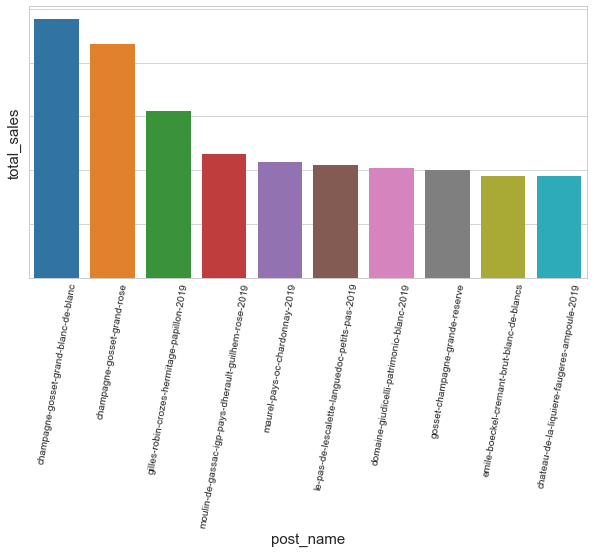

In [ ]:
fig=plt.figure(figsize=(10,5))
ax=sns.barplot(x='post_name', y="total_sales", data=produits_les_plus_vendus)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 80, fontsize=10)
plt.savefig('produits_les_plus_vendus')
plt.xlabel('post_name',fontsize=15)
plt.ylabel("total_sales",fontsize=15)
plt.show()

In [ ]:
#Les produits qui rapportent le plus de CA
produits_qui_rapportent_le_plus_ca = tab1.nlargest(10, ['ca'])[['product_id_x','id_web','post_name','price','total_sales','ca']] 
produits_qui_rapportent_le_plus_ca

,product_id_x,id_web,post_name,price,total_sales,ca
286,4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,96.0,4704.0
162,4144,1662,champagne-gosset-grand-rose,49.0,87.0,4263.0
310,4402,3510,cognac-frapin-vip-xo,176.0,13.0,2288.0
161,4142,11641,champagne-gosset-grand-millesime-2006,53.0,30.0,1590.0
160,4141,304,gosset-champagne-grande-reserve,39.0,40.0,1560.0
293,4355,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,11.0,1391.5
291,4352,15940,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,5.0,1125.0
170,4153,16237,elian-daros-cotes-du-marmandais-clos-baquey-2015,29.0,36.0,1044.0
761,6206,16580,domaine-giudicelli-patrimonio-blanc-2019,25.2,41.0,1033.2
121,4068,16416,gilles-robin-crozes-hermitage-papillon-2019,16.6,62.0,1029.2


<ipython-input-51-1b125ebc8beb>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax.get_yticklabels(),rotation = 80, fontsize=10)


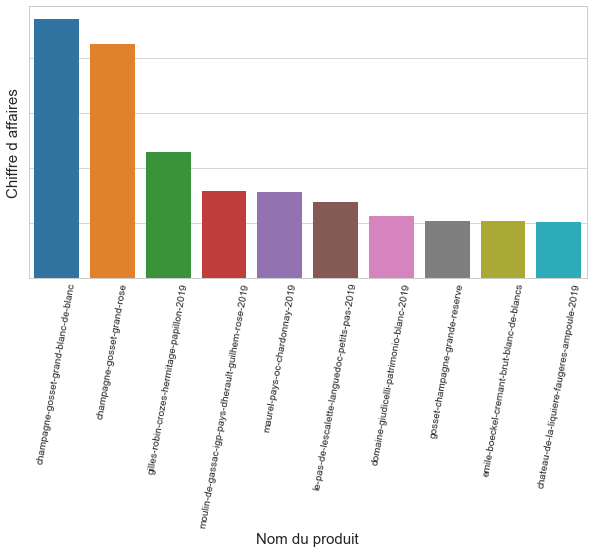

In [ ]:
fig=plt.figure(figsize=(10,5))
ax2=sns.barplot(x='post_name', y="ca", data=produits_qui_rapportent_le_plus_ca)
ax2.set_xticklabels(ax.get_xticklabels(),rotation = 80, fontsize=10)
ax2.set_yticklabels(ax.get_yticklabels(),rotation = 80, fontsize=10)
plt.savefig('produits_qui_rapportent_le_plus_ca.png')
plt.xlabel('Nom du produit',fontsize=15)
plt.ylabel('Chiffre d affaires',fontsize=15)
plt.show()

<AxesSubplot:xlabel='price'>

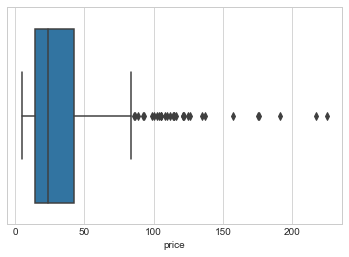

In [ ]:
#Vérification des valeurs abérrantes avec seaborn 
sns.boxplot(x=tab1['price'])

<span style='color:PURPLE'>Dans le graphique ci-dessus, on peut clairement voir que les valeurs supérieures à 80 agissent comme des valeurs aberrantes.</span>

In [ ]:
#Vérification des valeurs abérrantes avec l’approche IQR (Inter Quartile Range) 
# IQR
Q1 = np.percentile(tab1['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(tab1['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Above Upper bound
max_price=Q3+1.5*IQR

# Below Lower bound
min_price=Q1-1.5*IQR

max_price,min_price


(84.22500000000001, -27.975)

In [ ]:
# Position des valeurs aberrantes 
print(np.where((tab1['price']>max_price)|(tab1['price']<min_price)))

(array([ 63,  65, 199, 201, 205, 218, 219, 221, 222, 227, 380, 381, 426,
       431, 432, 437, 438, 502, 511, 553, 587, 602, 603, 604, 642, 647,
       648, 653, 654, 655, 656, 657]),)


In [ ]:
#Ensemble des valeurs aberrantes
tab_aberrantes=tab1.loc[(tab1['price']<min_price)|(tab1['price']>max_price)]
tab_aberrantes

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
154,4115,15382,1,100.0,11,instock,15382,0.0,0.0,0.0,...,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
156,4132,11668,1,88.4,5,instock,11668,0.0,0.0,0.0,...,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
291,4352,15940,1,225.0,0,outofstock,15940,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0
293,4355,12589,1,126.5,2,instock,12589,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1391.5
297,4359,13853,1,85.6,0,outofstock,13853,0.0,0.0,0.0,...,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,85.6
310,4402,3510,1,176.0,8,instock,3510,0.0,0.0,0.0,...,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0
311,4404,3507,1,108.5,2,instock,3507,0.0,0.0,0.0,...,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,217.0
313,4406,7819,1,157.0,3,instock,7819,0.0,0.0,0.0,...,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
314,4407,3509,1,104.0,6,instock,3509,0.0,0.0,0.0,...,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,104.0
320,4582,12857,1,109.6,7,instock,12857,0.0,0.0,0.0,...,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


In [ ]:
#Création fichier sans les valeurs abérrantes
tab_non_aberrantes=tab1.loc[(tab1['price']>min_price)&(tab1['price']<max_price)]
tab_non_aberrantes

,product_id_x,id_web,onsale_web,price,stock_quantity,stock_status,product_id_y,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,16135,1,8.4,83,instock,16135,0.0,0.0,0.0,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.0
820,7023,15891,1,27.5,15,instock,15891,0.0,0.0,0.0,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
821,7025,15887,1,69.0,2,instock,15887,0.0,0.0,0.0,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
822,7247,13127-1,1,54.8,23,instock,13127-1,0.0,0.0,0.0,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
